# Plaicraft

A research group in Computer Science at UBC collected data about how people play video games by setting up a MineCraft server and recording players' actions. 

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1) Data Description

### Players Dataset:

In [2]:
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Data regarding all the unique player's information was collected as player's signed in to play the game. 

For the players dataset, there are:
- 196 observations
- 7 variables, which are: 

In [11]:
played_hours_range <- players|>
    summarize(range = range(played_hours))
played_hours_range
played_hours_mean <- players|>
    summarize(mean = mean(played_hours)) |>
    mutate(mean = round(mean, 2))
played_hours_mean
players_age_range <- players|>
    summarize(range = range(Age, na.rm = TRUE))
players_age_range
players_age_mean <- players|>
    summarize(mean = mean(Age, na.rm = TRUE)) |>
    mutate(mean = round(mean, 2))
players_age_mean

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


range
<dbl>
0.0
223.1


mean
<dbl>
5.85


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


range
<dbl>
9
58


mean
<dbl>
21.14


Played hours...
- ranges from 0 to 223.1 hours
- has a mean of 5.85 hours

Players' age...
- ranges from 8 to 58 years old
- has a mean of 21.14 years old

Issues exist in this dataset in that:

Visible/within the data: 
- many of the players' ages were not recorded (n.a)
- some players did not play the game (0 hours played), but their data is still included in other parts of the study (e.g. if we are looking for players' mean age, then the people who played 0 hours won't count as a player)

Invisible: 
-  the experience level were entered by the players themselves, and not obtained through a systematic method

### Sessions Dataset:

In [4]:
sessions <- read_csv("sessions.csv")
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


Data regarding each player's play sessions time were recorded through monitoring the game.  

For the sessions dataset, there are:
- 1535 observations
- 5 variables, which are: 

In [7]:
mean_session_time <- sessions|>
    summarize(mean_session_time = mean(original_end_time - original_start_time, na.rm = TRUE), )
mean_session_time

mean_session_time
<dbl>
2909328


ERROR: Error in sd(sessions, original_end_time - original_start_time, na.rm = TRUE): unused argument (original_end_time - original_start_time)


Issues exist in this dataset in that: 

Visible: 
- when original_start_time is equal to original_end_time, standard deviation cannot be calculated

Invisible issues in this data exist in that: 
- original_start_time and original_end_time are in UNIX time, which are rounded from the start_time and end_time columns, so precision is lost

## 2) Questions

The broad question I will address is Question 2: "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts." Data about how people play video games is achieved when recording how people play games, so data is contributed when a player spends in the game. 

The specific question I have formulated is: "Can Age predict the relative amounts of a player's played_hours?

The players dataset will make this regression problem possible by providing the total played_hours and Age of each player. The data is already tidy since my variables of interest are in different columns. I will explore the dataset more to decide on the predictive method to be used. 

## 3) Exploratory Data Analysis and Visualization

In [7]:
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


My dataset is tidy: played_hours and Age are in separate columns.

In [9]:
means <- players|>
    summarize(mean_played_hours = mean(played_hours),
             mean_age = mean(Age, na.rm = TRUE))
means

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


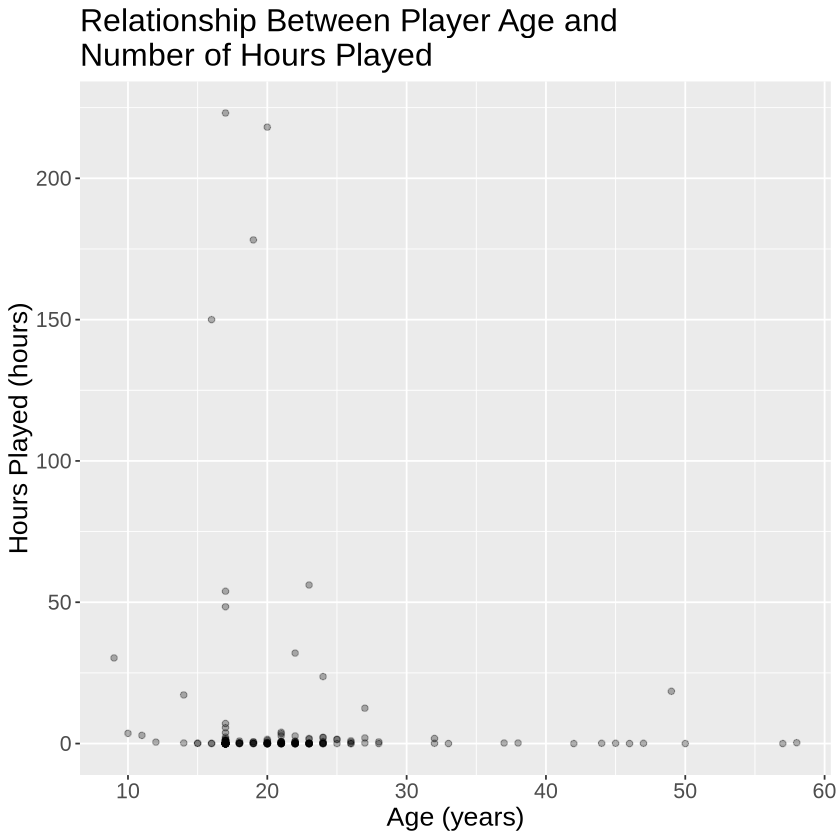

In [8]:
trend <- ggplot(players, aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.3) +
    labs(x = "Age (years)", 
         y = "Hours Played (hours)", 
         title = "Relationship Between Player Age and\nNumber of Hours Played") +
    theme(text = element_text(size = 16))
trend

From a scatter plot of number of hours played vs player age, we can observe that the relationship is not linear. Therefore, we might want to use the K-nearest-neighbors model to perform regression. 

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


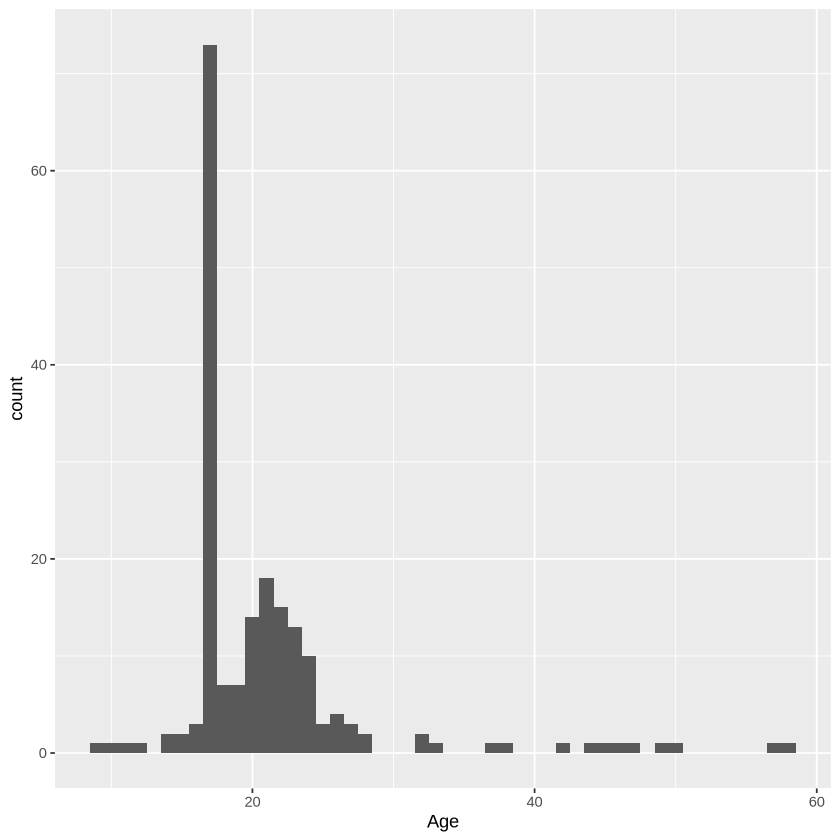

In [24]:
age_distribution <- ggplot(players, aes(x = Age)) +
    geom_histogram(binwidth = 1)
age_distribution

From a histogram representing the distribution of player age, we can observe that the majority of players are 18 years old. That means there is the greatest uncertainty in predicting played_hours in this age.

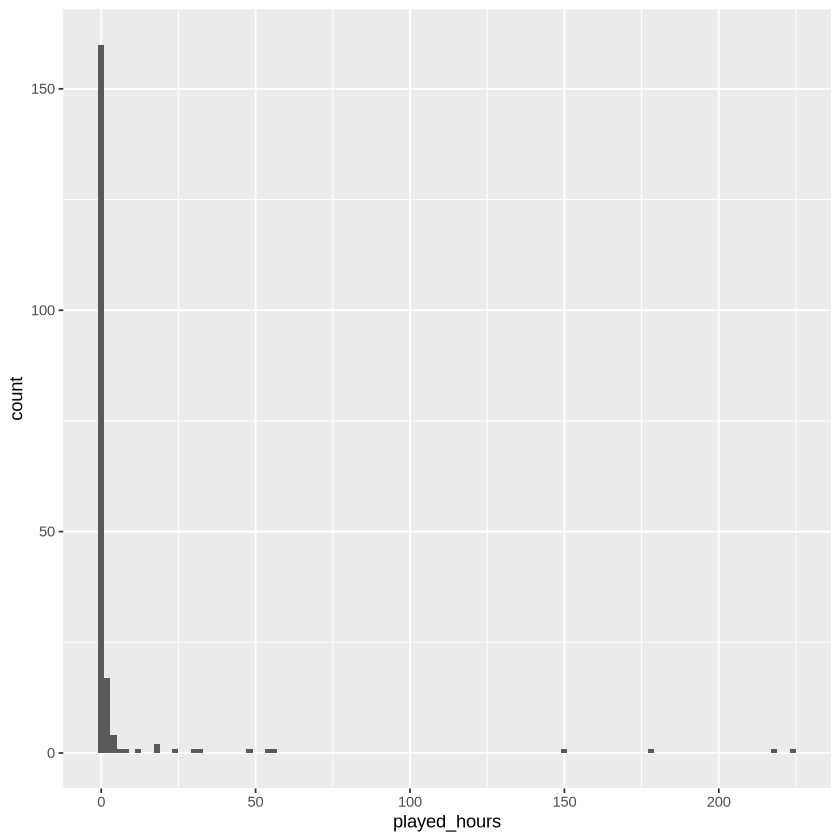

In [21]:
played_hours_distribution <- ggplot(players, aes(x = played_hours)) +
    geom_histogram(binwidth = 2)
played_hours_distribution

From a histogram representing the distribution of played_hours, we can observe that the majority players played 0 hours. We might want to consider the effect this has by using these observations to train our model. 

## 4) Methods and Plan

Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

In your explanation, respond to the following questions:

- Why is this method appropriate?
- Which assumptions are required, if any, to apply the method selected?
- What are the potential limitations or weaknesses of the method selected?
- How are you going to compare and select the model?
- How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?

- I will use K-nearest-neighbors regression with predictor variable Age to predict response variable played_hours. I want to remove all the 0 hours played observations, because the group of people with 0 hours played is fundamentally different than the players who played an amount of hours. 
- Unlike those with any amount of playtime, they never engaged with the game, making their inclusiona different meaning with analyses of player engagement. The variable hours played is only meaningful for those who actually played.
- This method is appropriate because relationship is not linear, there is only one predictor variable
- limitation: cannot predict played_hours beyond given range of age
- 